# Analyse des données historiques d'Apple Inc. (AAPL)
This notebook analyzes the historical stock data of Apple Inc. between 2010 and 2024.


## Chargement des données
We load the CSV file exported from Nasdaq.


In [8]:
import pandas as pd

data = pd.read_csv("AAPL.csv")
print(data.columns)
print(data.head())


Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')
         Date Close/Last    Volume      Open     High      Low
0  07/11/2025    $211.16  39765810  $210.565  $212.13  $209.86
1  07/10/2025    $212.41  44443640  $210.505  $213.48  $210.03
2  07/09/2025    $211.14  48749370   $209.53  $211.33  $207.22
3  07/08/2025    $210.01  42848930   $210.10  $211.43  $208.45
4  07/07/2025    $209.95  50228980   $212.68  $216.23  $208.80


## Nettoyage des données
We check for missing values and prepare the dataset.

In [9]:
# Nettoyage des colonnes
data.columns = data.columns.str.strip()

# Conversion brute
data['Close/Last_clean'] = (
    data['Close/Last']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.strip()
    .astype(float)
)


## Visualisation générale
Graphs of price trends and returns distributions.


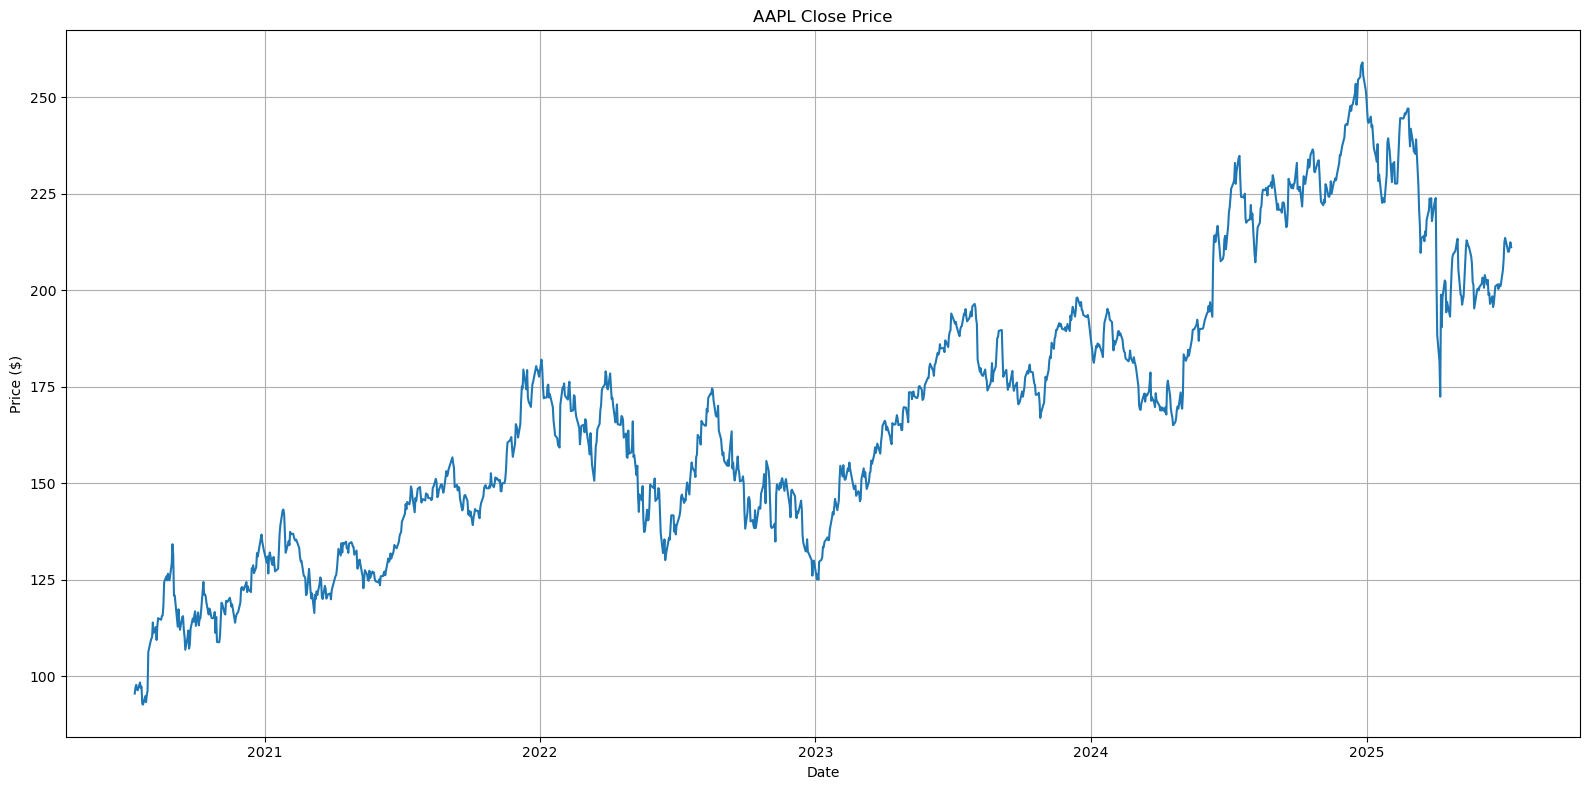

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(pd.to_datetime(data['Date']), data['Close/Last_clean'])
plt.title("AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Calcul des rendements journaliers
We calculate daily returns to evaluate volatility.


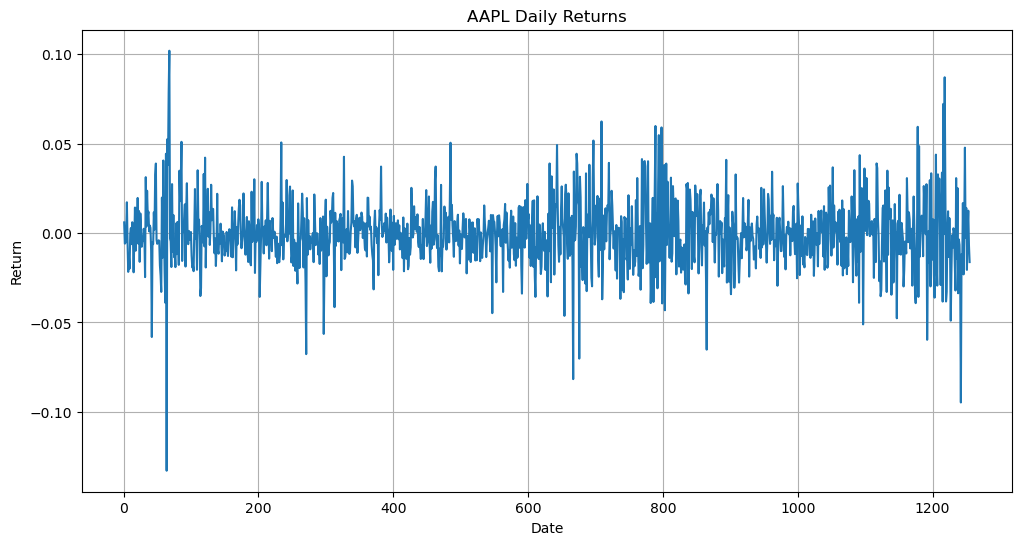

In [12]:
# Calculate daily returns
data['Daily Return'] = data['Close/Last_clean'].pct_change()

# Plot daily returns
plt.figure(figsize=(12,6))
plt.plot(data['Daily Return'])
plt.title("AAPL Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()

## Visualisation des tendances
Graphs of price trends and returns distributions.


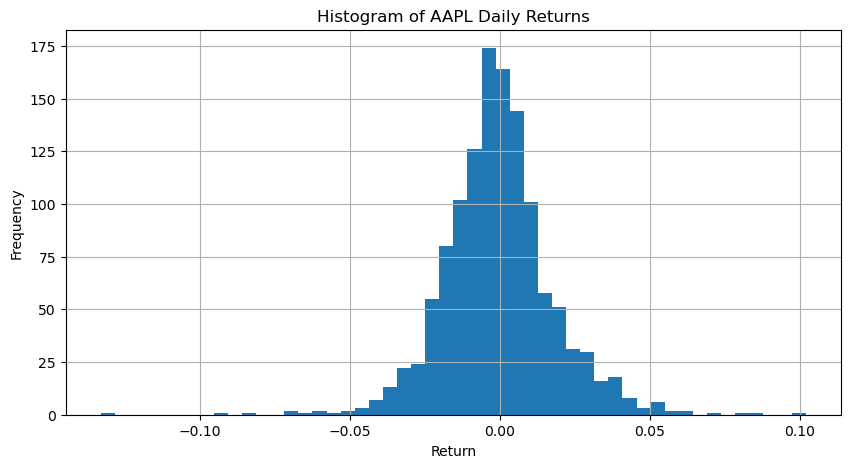

In [7]:
# Histogram of daily returns
plt.figure(figsize=(10,5))
data['Daily Return'].hist(bins=50)
plt.title("Histogram of AAPL Daily Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Statistiques descriptives
Overview of key metrics.

In [13]:
# Summary statistics
print(data['Daily Return'].describe())

count    1255.000000
mean       -0.000457
std         0.018707
min        -0.132914
25%        -0.011132
50%        -0.001139
75%         0.008515
max         0.101875
Name: Daily Return, dtype: float64


## Moving averages

Affichage des moving averages sur 20 et 50 jours.

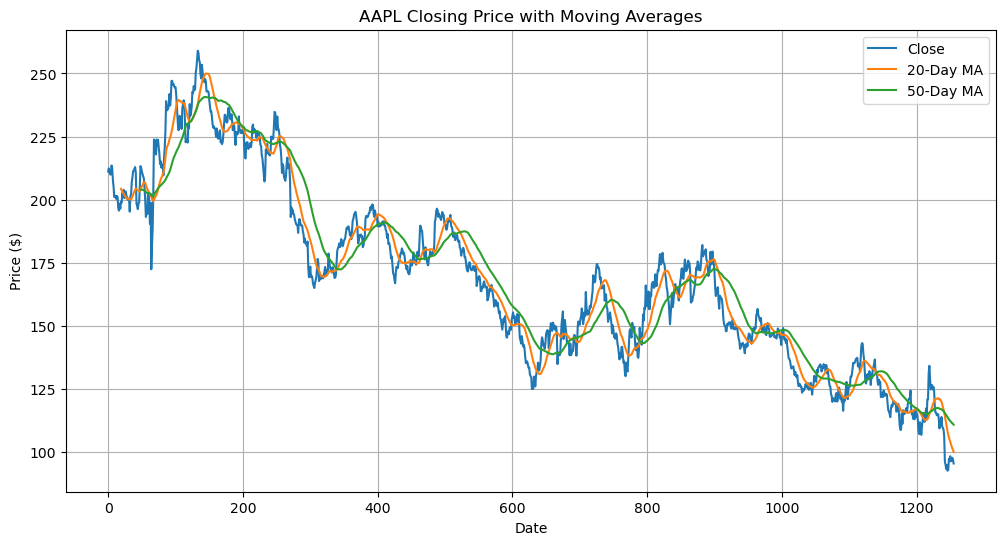

In [17]:
# Compute moving averages
data['20D MA'] = data['Close/Last_clean'].rolling(window=20).mean()
data['50D MA'] = data['Close/Last_clean'].rolling(window=50).mean()

# Plot with moving averages
plt.figure(figsize=(12,6))
plt.plot(data['Close/Last_clean'], label='Close')
plt.plot(data['20D MA'], label='20-Day MA')
plt.plot(data['50D MA'], label='50-Day MA')
plt.title("AAPL Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()
